

Statistiical ~ Quantum


The wave propagating through a random media.
Fogged glass.


2d is nice and visualizable

time domain vs frequency domain.

What is the input: pure plane wave vs statistical


What are we physically replicating:
Electron waves vs 

Anyway. Q1: How to do PDEs in Julia

https://discourse.julialang.org/t/how-to-start-partial-differential-equation-pde-solving-in-julia-for-modified-wave-equation/46555/6
https://www.youtube.com/watch?v=okGybBmihOE&ab_channel=TheJuliaProgrammingLanguage
Linear in time -> \omega 


It might be fun to do the iterative thing
Take a grid, schur out the end iteratively until converges.
Or take self consistent equation
Supriyo Datta

https://physics.stackexchange.com/questions/287152/understanding-the-sommerfeld-radiation-condition
somerfeld radiation condition

Other possibility: only use the forward waves.
BEM - This is a good point. I'd bet that the 2d strip prpbolem is solvable, probably even without discretization



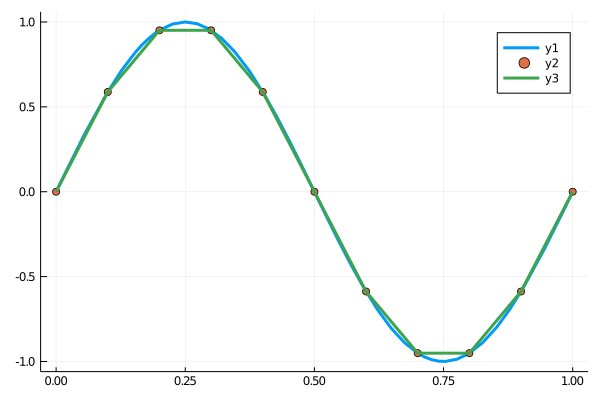

In [4]:
Δx = 0.1
x = 0:Δx:1
u(x) = sin(2π * x)
using Plots
plot(u, 0,1,lw=3)
scatter!(x,u.(x))
plot!(x, u.(x), lw=3)

In [4]:
using ApproxFun

┌ Info: Precompiling ApproxFun [28f2ccd6-bb30-5033-b560-165f7b14dc2f]
└ @ Base loading.jl:1278


In [14]:
f = Fun(Taylor(), [1,2,3])
Fun(exp)
a = Fun(cos, Chebyshev())
Fun(identity, -1..1)
space(a)
f = Fun(CosSpace()^2, [1,2,3])
dump(Fourier(PeriodicSegment()))
ChebyshevInterval() ∪ Circle(3,0.5) 

ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64},Float64},SinSpace{PeriodicSegment{Float64},Float64}},PeriodicSegment{Float64},Float64}
  spaces: Tuple{CosSpace{PeriodicSegment{Float64},Float64},SinSpace{PeriodicSegment{Float64},Float64}}
    1: CosSpace{PeriodicSegment{Float64},Float64}
      domain: PeriodicSegment{Float64}
        a: Float64 0.0
        b: Float64 6.283185307179586
    2: SinSpace{PeriodicSegment{Float64},Float64}
      domain: PeriodicSegment{Float64}
        a: Float64 0.0
        b: Float64 6.283185307179586


the union of 2 domains:
	1.	: -1.0 - 0.0im..1.0 + 0.0im (Chebyshev)
	2.	: 0.5🕒+3


In [19]:
dump(Fun(exp).space)

Chebyshev{ChebyshevInterval{Float64},Float64}
  domain: ChebyshevInterval{Float64} -1.0..1.0 (Chebyshev)


In [20]:
Derivative(CosSpace())

ConcreteDerivative : CosSpace(【0.0,6.283185307179586❫) → SinSpace(【0.0,6.283185307179586❫)
 0.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅    0.0  -2.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅     ⋅    0.0  -3.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅     ⋅     ⋅    0.0  -4.0    ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅     ⋅     ⋅     ⋅    0.0  -5.0    ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅    0.0  -6.0    ⋅     ⋅     ⋅   ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.0  -7.0    ⋅     ⋅   ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.0  -8.0    ⋅   ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.0  -9.0  ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.0  ⋱
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱

In [24]:
dump(Fourier())

ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64},Float64},SinSpace{PeriodicSegment{Float64},Float64}},PeriodicSegment{Float64},Float64}
  spaces: Tuple{CosSpace{PeriodicSegment{Float64},Float64},SinSpace{PeriodicSegment{Float64},Float64}}
    1: CosSpace{PeriodicSegment{Float64},Float64}
      domain: PeriodicSegment{Float64}
        a: Float64 0.0
        b: Float64 6.283185307179586
    2: SinSpace{PeriodicSegment{Float64},Float64}
      domain: PeriodicSegment{Float64}
        a: Float64 0.0
        b: Float64 6.283185307179586


In [39]:
d = Domain(-1..1)^2
x,y = Fun(d)
(x^2 + y^2)(0,1)
# Derivative(d)    # \scrD
Evaluation(d, (1,0))

EvaluationWrapper : Chebyshev(-1..1)⊗Chebyshev(-1..1) → ConstantSpace(Point(1))⊗ConstantSpace(Point(0))
 1.0  0.0  1.0  -1.0  0.0  1.0  -0.0  -1.0  0.0  1.0  ⋯

In [58]:

t = Fun(identity,0..1000) 
L = 𝒟^2+2I  # our differential operator, 𝒟 is equivalent to Derivative()

@manipulate for ω=0.:.1sqrt(2):2sqrt(2)
    u = [ivp(); L] \ [0.; 0.; cos(ω*t)]
    plot(u)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ω"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/philip/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/philip/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/philip/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/philip/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/philip/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f0b13e54760, Task (runnable) @0x00007f0b13e54760), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.141421\",\"0.282843\",\"0.424264\",\"0.565685\",\"0.707107\",\"0.848528\",\"0.989949\",\"1.13137\",\"1.27279\",\"1.41421\",\"1.55563\",\"1.69706\",\"1.83848\",\"1.9799\",\"2.12132\",\"2.26274\",\"2.40416\",\"2.54558\",\"2.68701\"],\"chang

In [51]:
using LinearAlgebra
using Plots
using Interact

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13844103454151956768\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11805722799934532532\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13844103454151956768\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

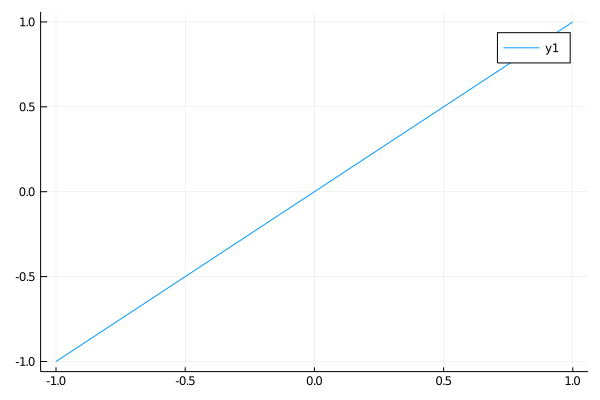

In [52]:
x = Fun()
#one = Fun(x -> 1)
#x⊗I + I⊗x
#x + I
plot(x)


In [54]:
d = Domain(-1..1)^2
Dirichlet(factor(d,1))⊗I

KroneckerOperator : Chebyshev(-1..1)⊗ApproxFunBase.UnsetSpace() → 2-element ArraySpace:
ConstantSpace{DomainSets.Point{Int64},Float64}[ConstantSpace(Point(-1)), ConstantSpace(Point(1))]⊗ApproxFunBase.UnsetSpace()


In [22]:
Evaluation(CosSpace(),0)

ConcreteEvaluation : CosSpace(【0.0,6.283185307179586❫) → ConstantSpace(Point(0))
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ⋯

In [9]:
function foo(x::Union{Char,Int64})
    if x isa Char
        return 1
    elseif x isa Int64
        return 2
    end
end

function foo2()
    x = rand() > 0.5 ? 3 : 'c'
    return foo(x)
end


@code_llvm foo(3)




;  @ In[9]:1 within `foo'
define i64 @julia_foo_1127(i64) {
top:
;  @ In[9]:5 within `foo'
  ret i64 2
}


In [22]:

struct Leaf
    n::Int64
end
struct Node
    l::Union{Leaf,Node}
    r::Union{Leaf,Node}
end

function addem(x::Union{Leaf,Node})
    if x isa Node
        return addem(x.l) + addem(x.r)
    elseif x isa Leaf
        return x.n
    end
end

x = Node(Leaf(3),Leaf(5))

@code_native addem(x)


	.text
; ┌ @ In[22]:10 within `addem'
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rbx
	movq	%rdi, %rbx
; │ @ In[22]:12 within `addem'
; │┌ @ Base.jl:33 within `getproperty'
	movq	(%rdi), %rdi
	movabsq	$139634891107120, %r13  # imm = 0x7EFF48152B30
	movabsq	$139634891145520, %r12  # imm = 0x7EFF4815C130
; │└
	movabsq	$.text, %r15
	movq	-8(%rdi), %rax
	andq	$-16, %rax
	cmpq	%r13, %rax
	je	L71
	cmpq	%r12, %rax
	jne	L117
	callq	*%r15
	movq	%rax, %r14
	jmp	L74
L71:
	movq	(%rdi), %r14
; │ @ In[22]:12 within `addem'
; │┌ @ Base.jl:33 within `getproperty'
L74:
	movq	8(%rbx), %rdi
; │└
	movq	-8(%rdi), %rax
	andq	$-16, %rax
	cmpq	%r13, %rax
	je	L101
	cmpq	%r12, %rax
	jne	L139
	callq	*%r15
	jmp	L104
L101:
	movq	(%rdi), %rax
; │ @ In[22]:12 within `addem'
; │┌ @ int.jl:86 within `+'
L104:
	addq	%r14, %rax
; │└
	popq	%rbx
	popq	%r12
	popq	%r13
	popq	%r14
	popq	%r15
	retq
L117:
	movabsq	$jl_throw, %rax
	movabsq	$jl_system_image_data, %rdi
	callq	*%rax
L139:
	movabsq	$jl_throw, %rax
	mova